In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# Data preparation
sample1 = np.array([[0.1, 1.1],
           [6.8, 7.1],
           [-3.5, -4.1],
           [2.0, 2.7],
           [4.1, 2.8],
           [3.1, 5.0],
           [-0.8, -1.3],
           [0.9, 1.2],
           [5.0, 6.4],
           [3.9, 4.0]])
sample2 = np.array([[7.1, 4.2],
           [-1.4, -4.3],
           [4.5, 0.0],
           [6.3, 1.6],
           [4.2, 1.9],
           [1.4, -3.2],
           [2.4, -4.0],
           [2.5, -6.1],
           [8.4, 3.7],
           [4.1, -2.2]])
sample3 = np.array([[-3.0, -2.9],
           [0.5, 8.7],
           [2.9, 2.1],
           [-0.1, 5.2],
           [-4.0, 2.2],
           [-1.3, 3.7],
           [-3.4, 6.2],
           [-4.1, 3.4],
           [-5.1, 1.6],
           [1.9, 5.1]])
sample4 = np.array([[-2.0, -8.4],
           [-8.9, 0.2],
           [-4.2, -7.7],
           [-8.5, -3.2],
           [-6.7, -4.0],
           [-0.5, -9.2],
           [-5.3, -6.7],
           [-8.7, -6.4],
           [-7.1, -9.7],
           [-8.0, -6.3]])

In [23]:
def Batch_perceptron(data, lr=0.5, threshold=1e-10, max_iter=10000):
    a = np.zeros([data.shape[-1],1])
    num = 0
    for i in range(max_iter):
        result = np.dot(data, a)
        index,_ = np.where(result <= 0)
        error = np.sum(data[index],axis=0)
        a += lr * error.reshape([data.shape[-1],1])
        num += 1
        if abs(error).sum()<threshold:
            print('total iter:%d' % num)
            print('total error: %d' %error.sum())
            return a
        if num >= max_iter:
            print('Batch_perceptron 算法没有有效收敛')

In [24]:
def Plot_figure(nums, a, save=None):
    plt.xlabel(r'$X_1$')
    plt.ylabel(r'$X_2$')
    x1 = sample1[:, 0]
    y1 = sample1[:, 1]
    x2 = sample2[:, 0]
    y2 = sample2[:, 1]
    x3 = sample3[:, 0]
    y3 = sample3[:, 1]
    x4 = sample4[:, 0]
    y4 = sample4[:, 1]
    x = [x1, x2, x3, x4]
    y = [y1, y2, y3, y4]
    area = np.pi * 2 ** 2
    colors = ['red', 'green', 'purple', 'blue']
    if a[1] != 0:
        xd = np.arange(-6, 6, 0.01)
        yd = -a[2]/a[1]-a[0]*xd/a[1]
        plt.plot(xd, yd, linewidth='0.5')
    for num in nums:
        plt.scatter(x[int(num)-1], y[int(num)-1], s=area, c=colors[int(num)-1],
                    alpha=0.4, label='w'+num)
    plt.legend()
    if type(save) is str:
        plt.savefig(save + '.svg', format='svg')
    plt.show()

total iter:24
total error: 0


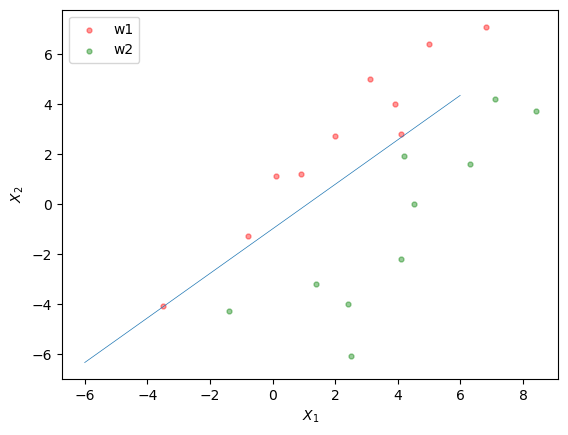

In [25]:
# for w1 and w2
column_of_ones = np.ones((sample1.shape[0], 1))
new_sample1 = np.concatenate([sample1, column_of_ones],axis=1)
new_sample2 = np.concatenate([sample2, column_of_ones],axis=1)
data = np.concatenate([new_sample1,-new_sample2])
data
result = Batch_perceptron(data)
Plot_figure(['1','2'], result)

total iter:17
total error: 0


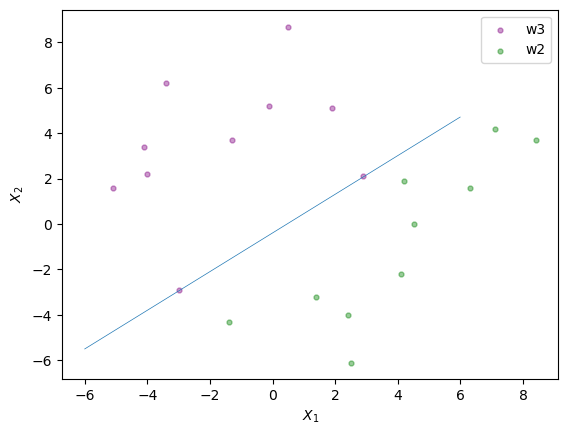

In [26]:
# for w3 and w2
column_of_ones = np.ones((sample3.shape[0], 1))
new_sample3 = np.concatenate([sample3, column_of_ones],axis=1)
new_sample2 = np.concatenate([sample2, column_of_ones],axis=1)
data = np.concatenate([new_sample2,-new_sample3])
data
result = Batch_perceptron(data)
Plot_figure(['3','2'], result)

In [36]:
def Ho_Kashyap(data,lr=0.5, threshold=1e-10, max_iter=100000):
    a = np.ones([data.shape[-1],1])
    b = np.ones([len(data), 1])
    Y = np.linalg.pinv(data)
    num = 0
    for i in range(max_iter):
        error = data.dot(a)-b
        b = b + lr*(error+abs(error))
        a = Y.dot(b)
        num += 1
        if abs(error).sum() < threshold:
            print('total iter:%d' % num)
            print('total error: %d' %abs(error).sum())
            return a, b
        if num >= max_iter:
            print('Ho_Kashyap 算法没有有效收敛')
            print('total error: %d' %abs(error).sum())
            return a, b

Ho_Kashyap 算法没有有效收敛
total error: 29


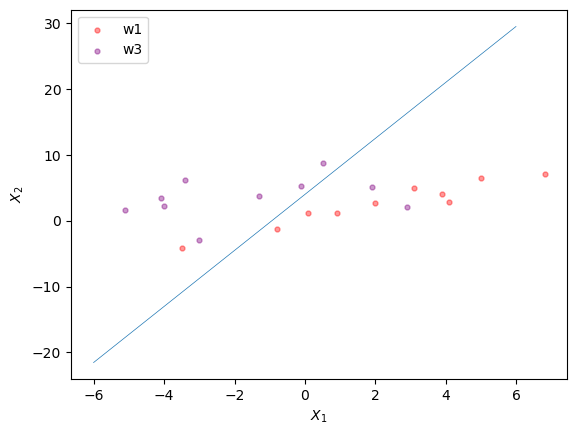

In [39]:
# for w1 and w3
column_of_ones = np.ones((sample1.shape[0], 1))
new_sample1 = np.concatenate([sample1, column_of_ones],axis=1)
new_sample3 = np.concatenate([sample3, column_of_ones],axis=1)
data = np.concatenate([new_sample1,-new_sample3])
result = Ho_Kashyap(data)
Plot_figure(['1','3'], result[0],save='w1-3')

total iter:5319
total error: 0


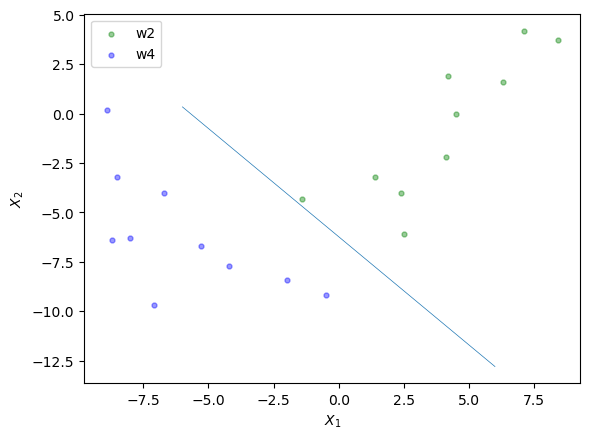

In [40]:
# for w2 and w4
column_of_ones = np.ones((sample1.shape[0], 1))
new_sample2 = np.concatenate([sample2, column_of_ones],axis=1)
new_sample4 = np.concatenate([sample4, column_of_ones],axis=1)
data = np.concatenate([new_sample2,-new_sample4])
result = Ho_Kashyap(data)
Plot_figure(['2','4'], result[0],save='w2-4')

In [77]:
def MSE(data, data_test):
    Y_train = data  # 3*32
    Y_test = data_test  # 3*8
    # label_test = [[11000000],[00110000],[00001100],[00000011]]
    label_train = np.zeros([4, 32])
    label_test = np.zeros([4, 8])
    for i in range(len(label_train)):
        for j in range(len(label_train[0])):
            label_train[i, j] = int(int(j / 8) == i)
    for i in range(len(label_test)):
        for j in range(len(label_test[0])):
            label_test[i, j] = int(int(j / 2) == i)
    a = np.linalg.pinv(Y_train.T).dot(label_train.T).T
    target = np.arange(1, 5).dot(label_test)  # [11223344]
    output = np.argmax(a.dot(Y_test), axis=0) + np.ones(8) 
    accuracy = sum(output == target) / len(target)
    print('MSE准则多分类：\ntarget = {}\noutput = {}\naccuracy = {}'.format(
        target, output, accuracy))

In [80]:
column_of_ones = np.ones((sample1.shape[0], 1))
new_sample1 = np.concatenate([sample1, column_of_ones],axis=1)
new_sample2 = np.concatenate([sample2, column_of_ones],axis=1)
new_sample3 = np.concatenate([sample3, column_of_ones],axis=1)
new_sample4 = np.concatenate([sample4, column_of_ones],axis=1)
data = np.concatenate([new_sample1[:8].T, new_sample2[:8].T,
                      new_sample3[:8].T, new_sample4[:8].T],axis=1)
data_test = np.concatenate([new_sample1[-2:].T, new_sample2[-2:].T,
                      new_sample3[-2:].T, new_sample4[-2:].T],axis=1)

In [81]:
MSE(data, data_test)

MSE准则多分类：
target = [1. 1. 2. 2. 3. 3. 4. 4.]
output = [1. 1. 2. 2. 3. 3. 4. 4.]
accuracy = 1.0
